# XGBoost California Housing Data

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, root_mean_squared_error, mean_squared_error

In [3]:
# Load dataset
housingX, housingy = datasets.fetch_california_housing(return_X_y=True, as_frame=True)

In [4]:
housingX.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
housingy.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [6]:
housingX.shape

(20640, 8)

In [7]:
housingX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [8]:
housingX.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000


### EDA

<Figure size 2000x2000 with 0 Axes>

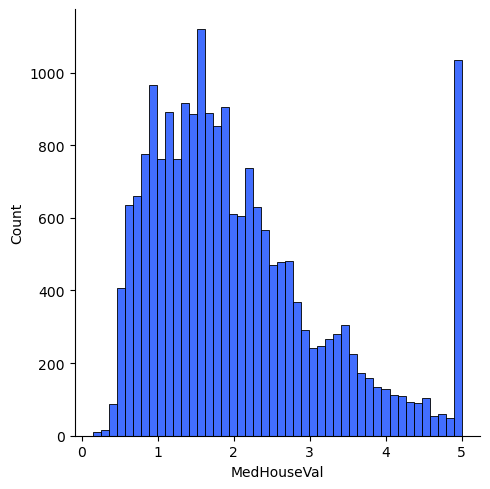

In [10]:
#plt.figure(figsize=(18,10))
plt.figure(figsize=(8,8), dpi=250)
sns.set_palette("bright")
sns.displot(data=housingy, kind='hist');

<Figure size 2000x2000 with 0 Axes>

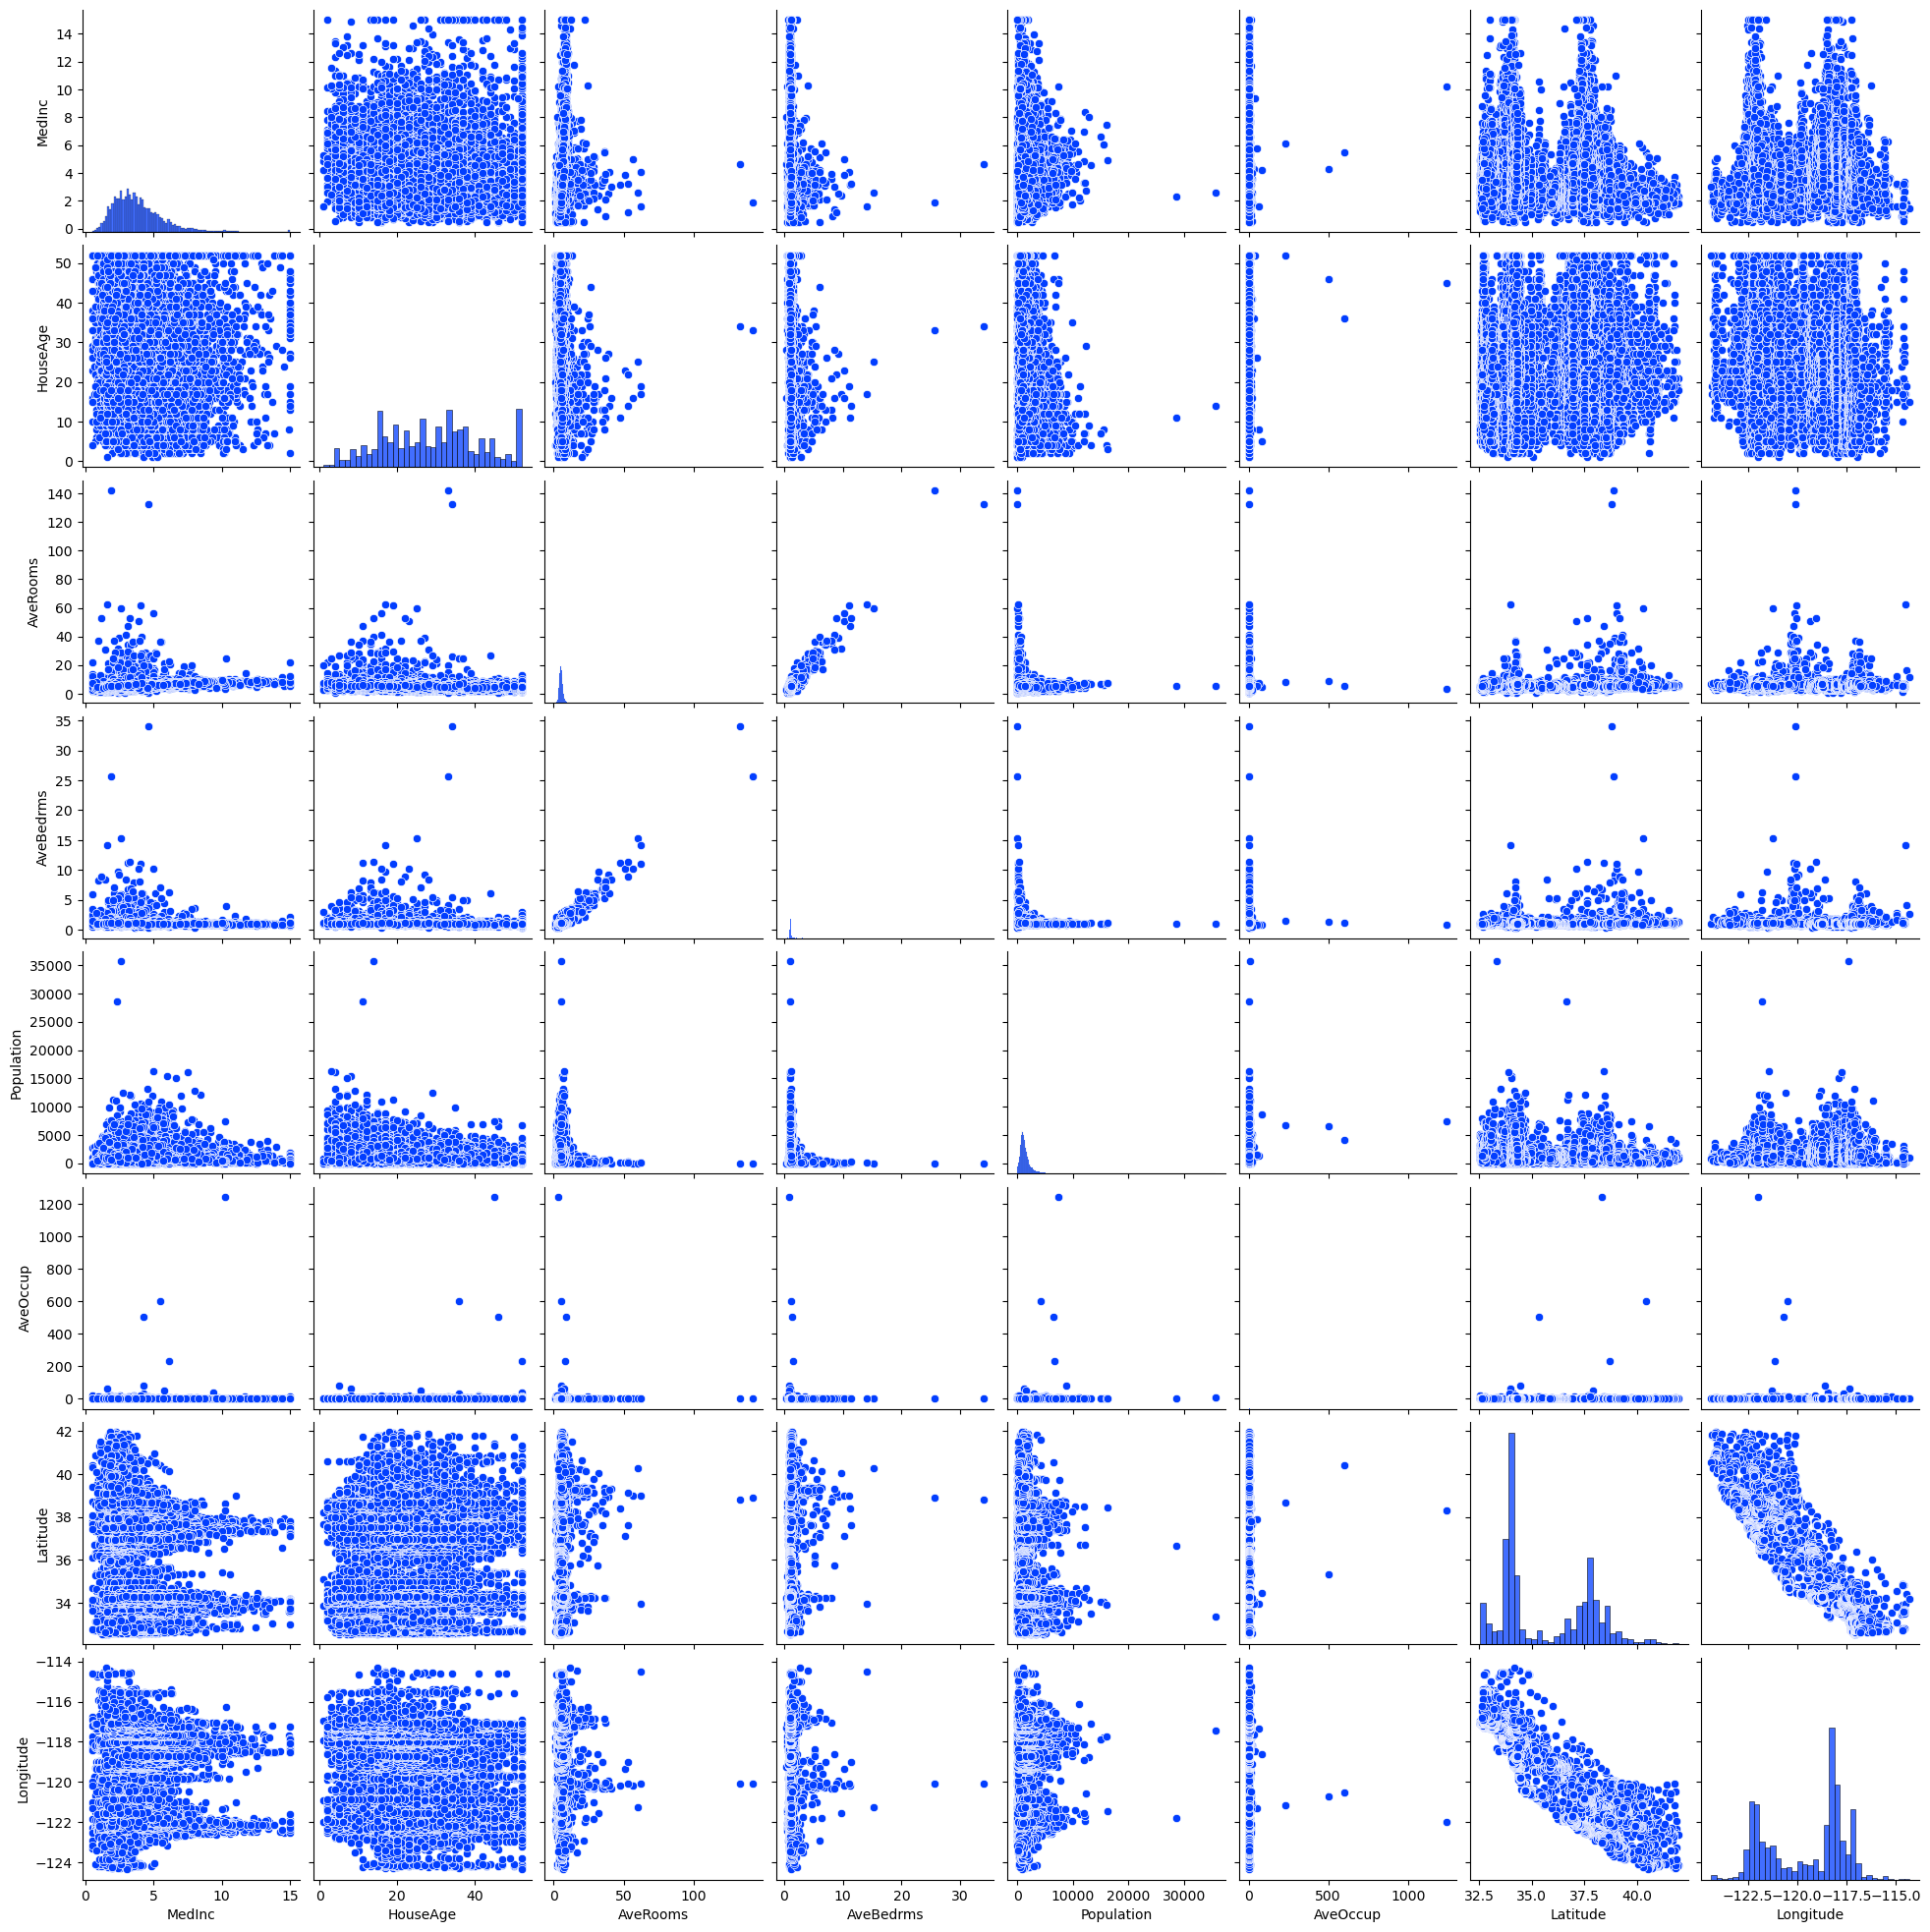

In [11]:
plt.figure(figsize=(8,8), dpi=250)
sns.set_palette("bright")
sns.pairplot(housingX);

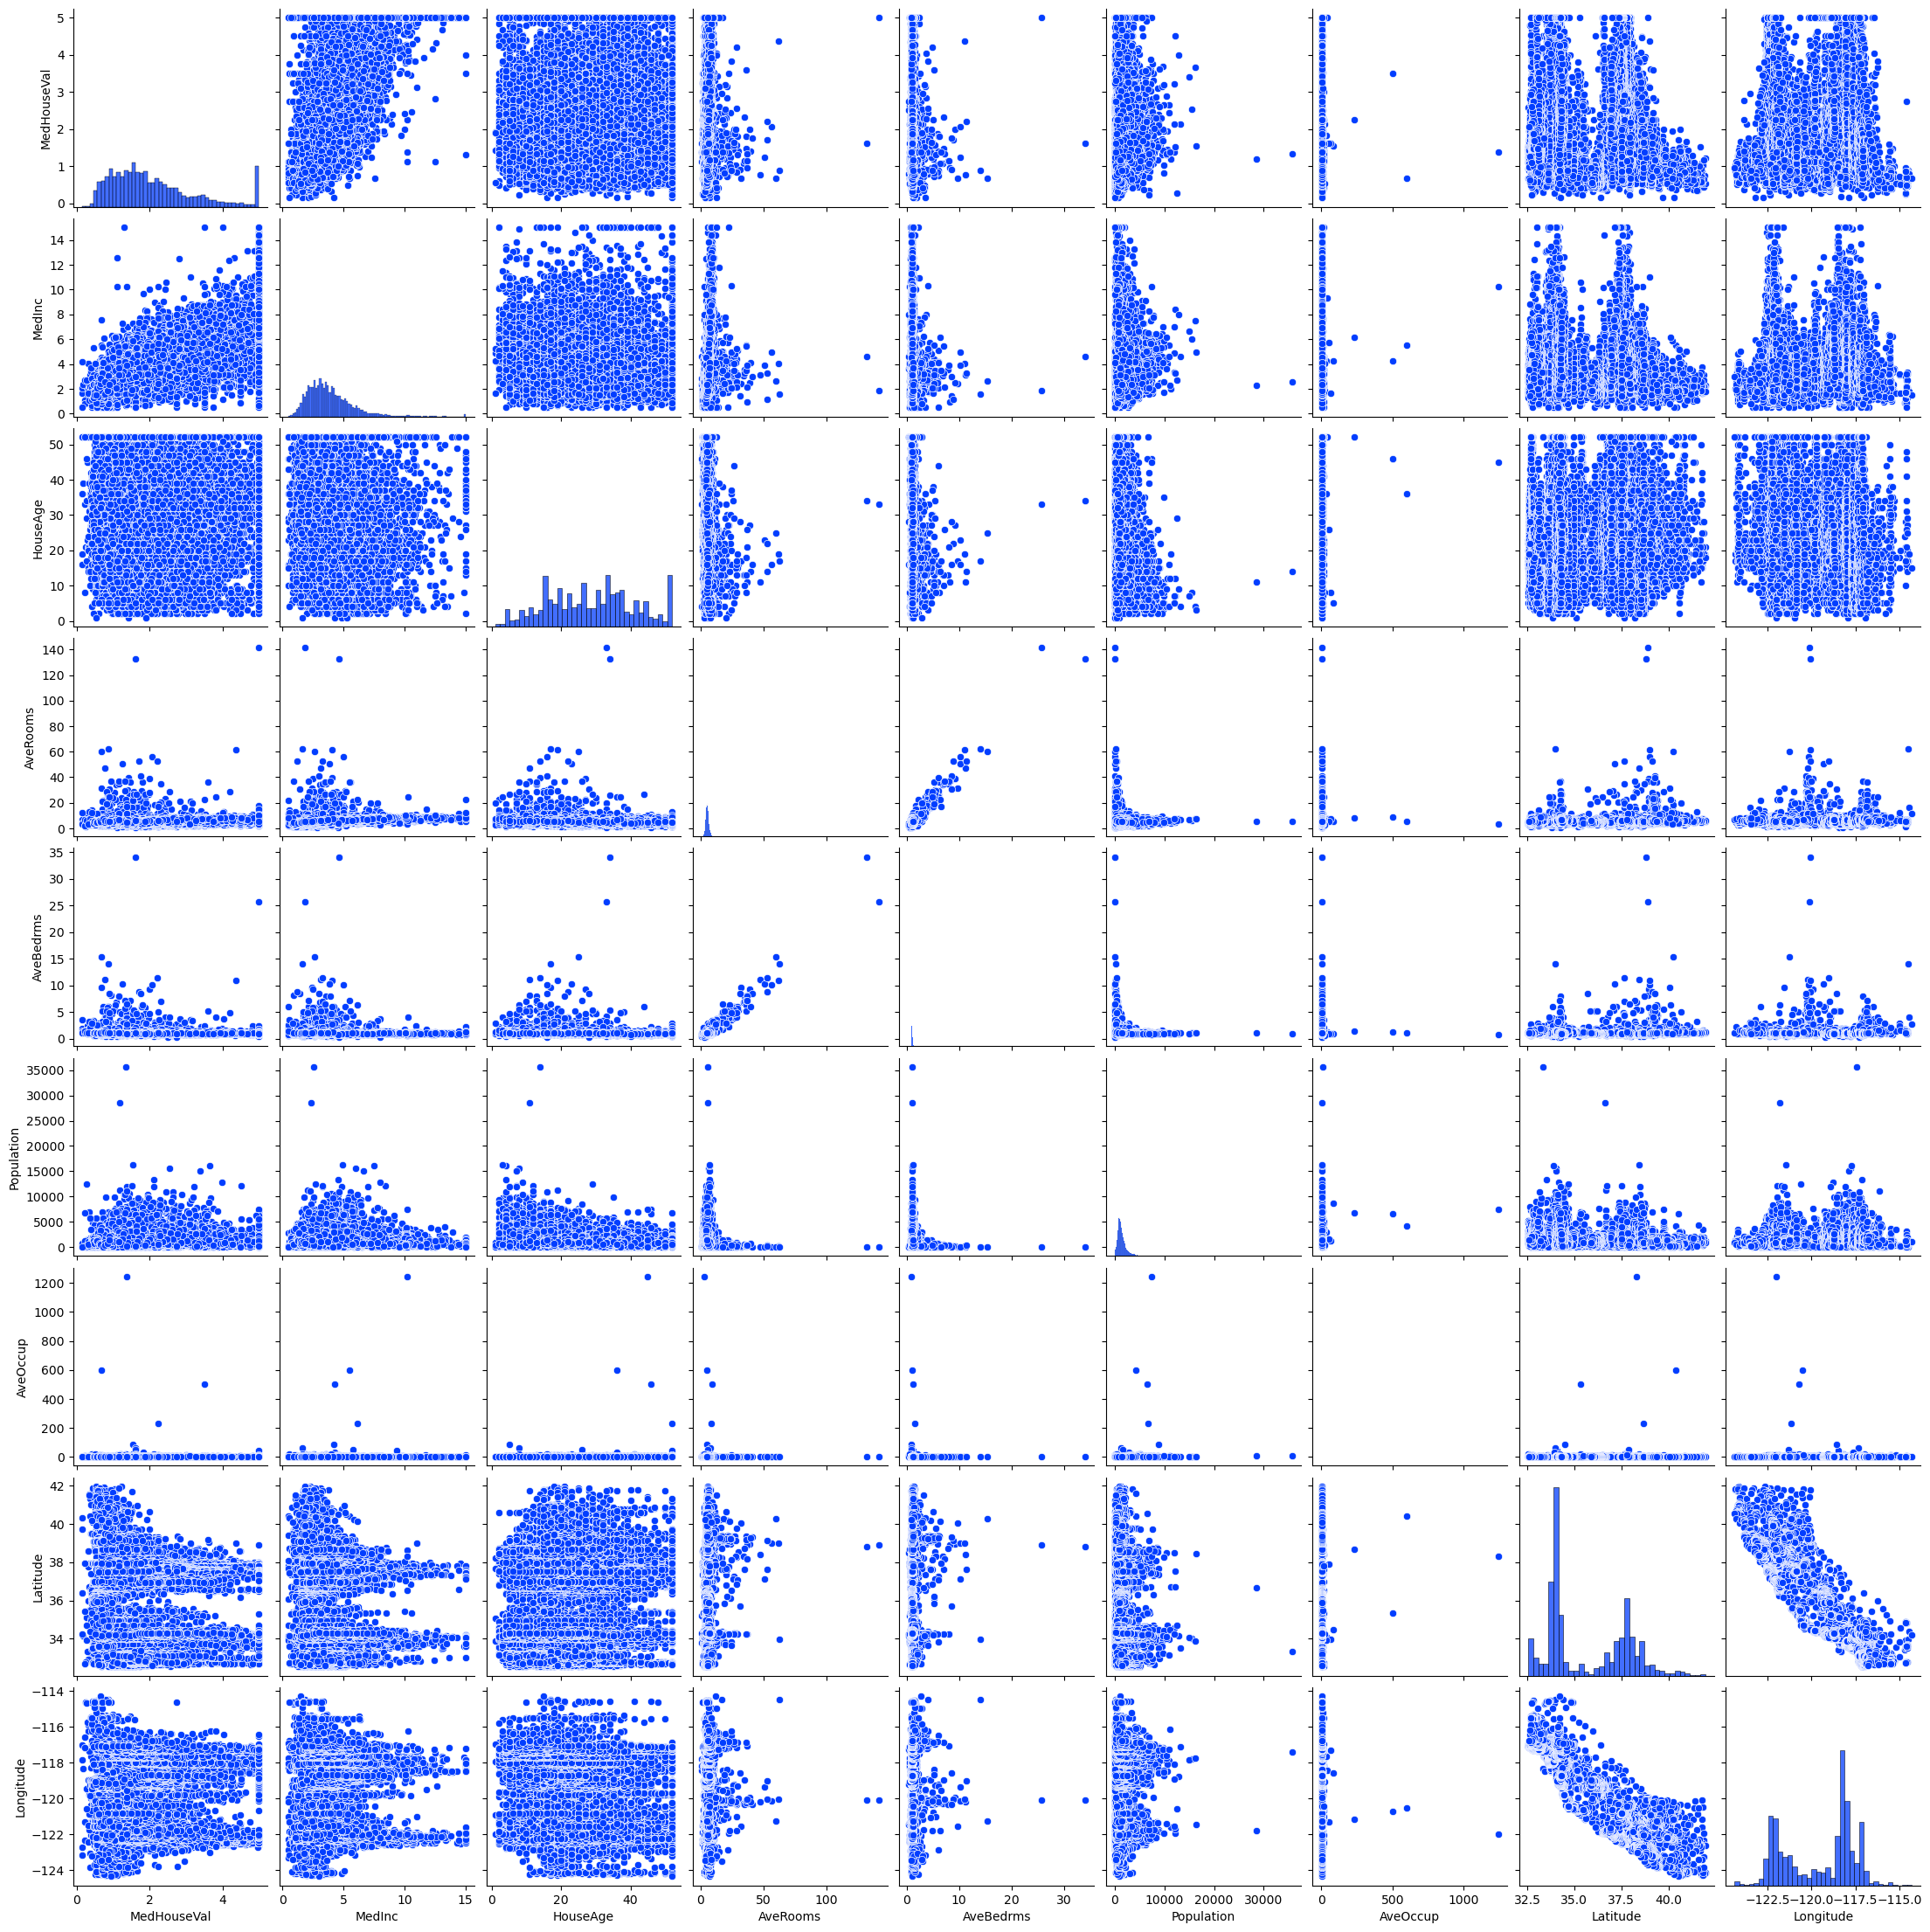

In [24]:
housingxy = pd.concat([housingy, housingX], axis=1)
graphxy = sns.pairplot(housingxy)

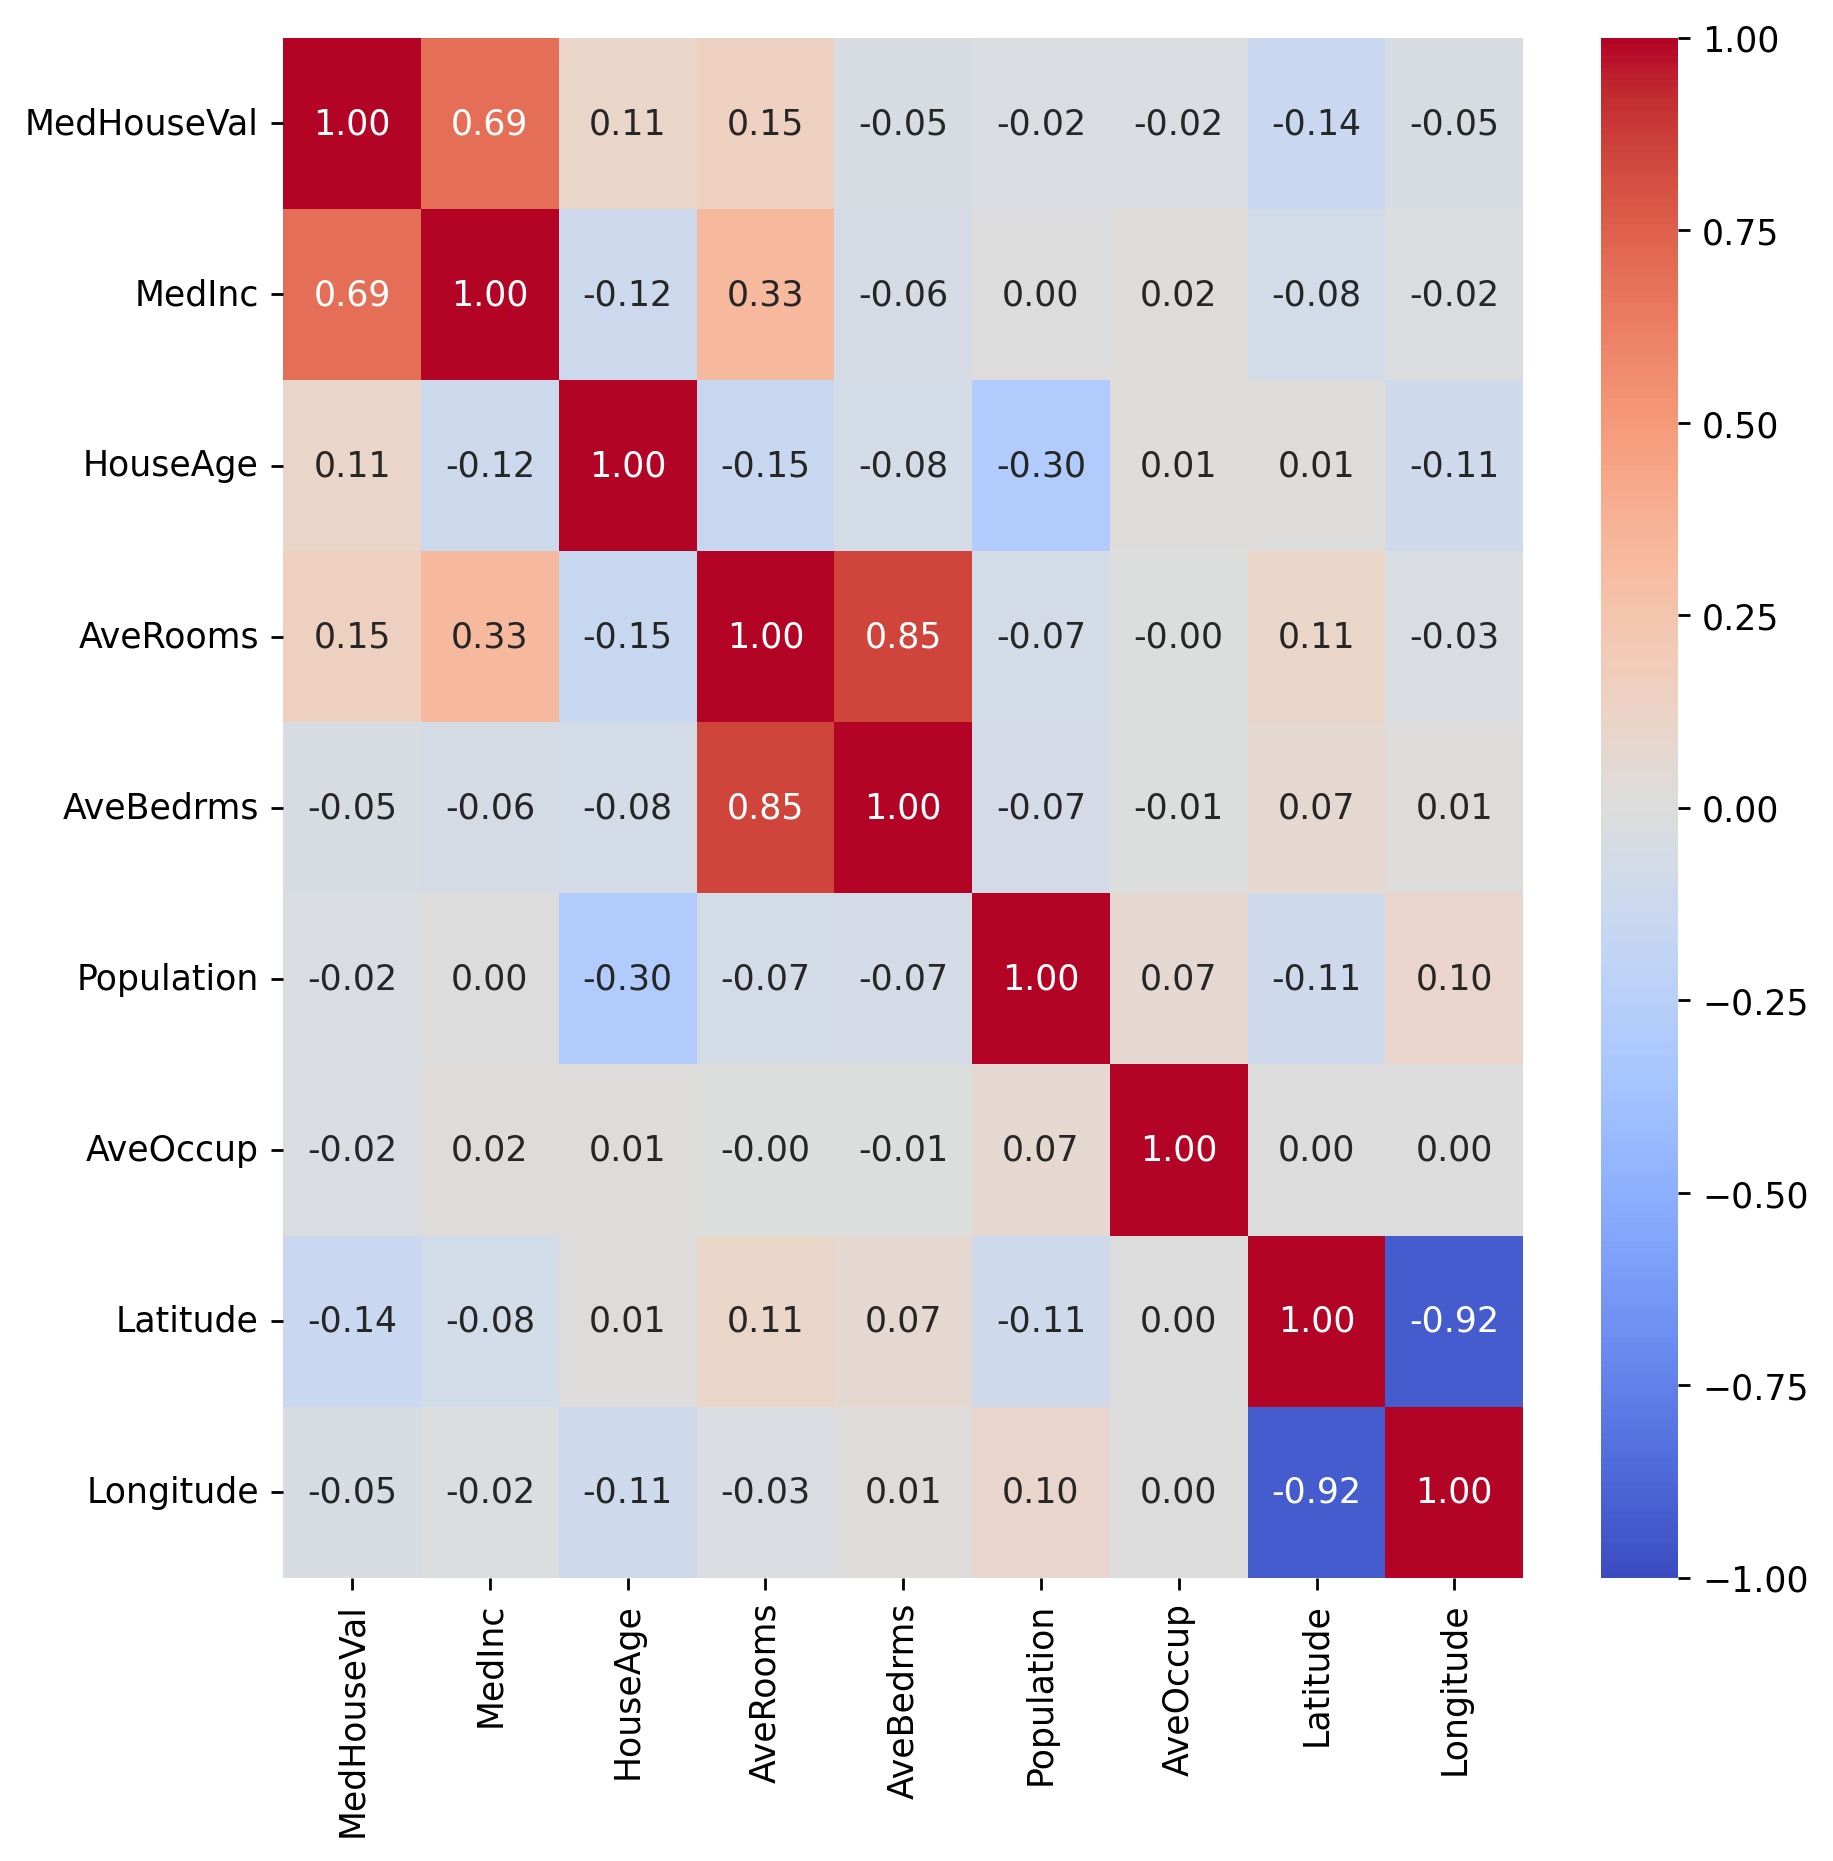

In [36]:
plt.figure(figsize=(8,8), dpi=250)
sns.heatmap(data=housingxy.corr(), cmap='coolwarm', annot=True, vmax=1, vmin=-1, fmt='.2f');

### Data Prep

In [41]:
X_train, X_test, y_train, y_test = train_test_split(housingX, housingy, test_size=0.2, random_state=17)

In [43]:
X_train.shape

(16512, 8)

In [45]:
X_test.shape

(4128, 8)

In [47]:
y_train.shape

(16512,)

In [49]:
y_test.shape

(4128,)

In [51]:
X_test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
18403,5.4741,24.0,6.587799,1.060181,4017.0,3.311624,37.24,-121.84
13405,1.9583,7.0,5.362805,1.442073,1064.0,3.243902,34.10,-117.46
9539,2.6058,40.0,3.885714,0.914286,785.0,4.485714,37.39,-120.71
8668,4.5817,30.0,4.146135,1.108696,1526.0,1.842995,33.82,-118.39
9019,8.0137,9.0,7.734673,1.041211,12873.0,3.274739,34.16,-118.78


### Make and Train Model

In [55]:
housevalue_regressor = xgb.XGBRegressor()

In [57]:
housevalue_regressor.fit(
    X_train, y_train, eval_set=[(X_test, y_test), (X_train, y_train)]
)

[0]	validation_0-rmse:0.93417	validation_1-rmse:0.93744
[1]	validation_0-rmse:0.80544	validation_1-rmse:0.79501
[2]	validation_0-rmse:0.72406	validation_1-rmse:0.70244
[3]	validation_0-rmse:0.66749	validation_1-rmse:0.63818
[4]	validation_0-rmse:0.63751	validation_1-rmse:0.60033
[5]	validation_0-rmse:0.61189	validation_1-rmse:0.56644
[6]	validation_0-rmse:0.58620	validation_1-rmse:0.53308
[7]	validation_0-rmse:0.57241	validation_1-rmse:0.51228
[8]	validation_0-rmse:0.56593	validation_1-rmse:0.50156
[9]	validation_0-rmse:0.55121	validation_1-rmse:0.48426
[10]	validation_0-rmse:0.54240	validation_1-rmse:0.47137
[11]	validation_0-rmse:0.53708	validation_1-rmse:0.46342
[12]	validation_0-rmse:0.53323	validation_1-rmse:0.45607
[13]	validation_0-rmse:0.53001	validation_1-rmse:0.45001
[14]	validation_0-rmse:0.52530	validation_1-rmse:0.44200
[15]	validation_0-rmse:0.52239	validation_1-rmse:0.43719
[16]	validation_0-rmse:0.52073	validation_1-rmse:0.43158
[17]	validation_0-rmse:0.51860	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [59]:
y_score = housevalue_regressor.predict(X_test)

### Make a Prediction

In [65]:
X_example = np.array([12.5,10,9,3,4000,3,33.98,-118.45])
X_example = X_example.reshape(1,8)
y_example = housevalue_regressor.predict(X_example)
print(y_example)

[5.4786406]


### Model Evaluation

In [82]:
predicter_r2 = r2_score(y_true=y_test, y_pred=y_score)
print(f'{predicter_r2:.4f}')


0.8167


In [88]:
predicter_rmse = root_mean_squared_error(y_true=y_test, y_pred=y_score)
print(predicter_rmse)

0.48955245051753077


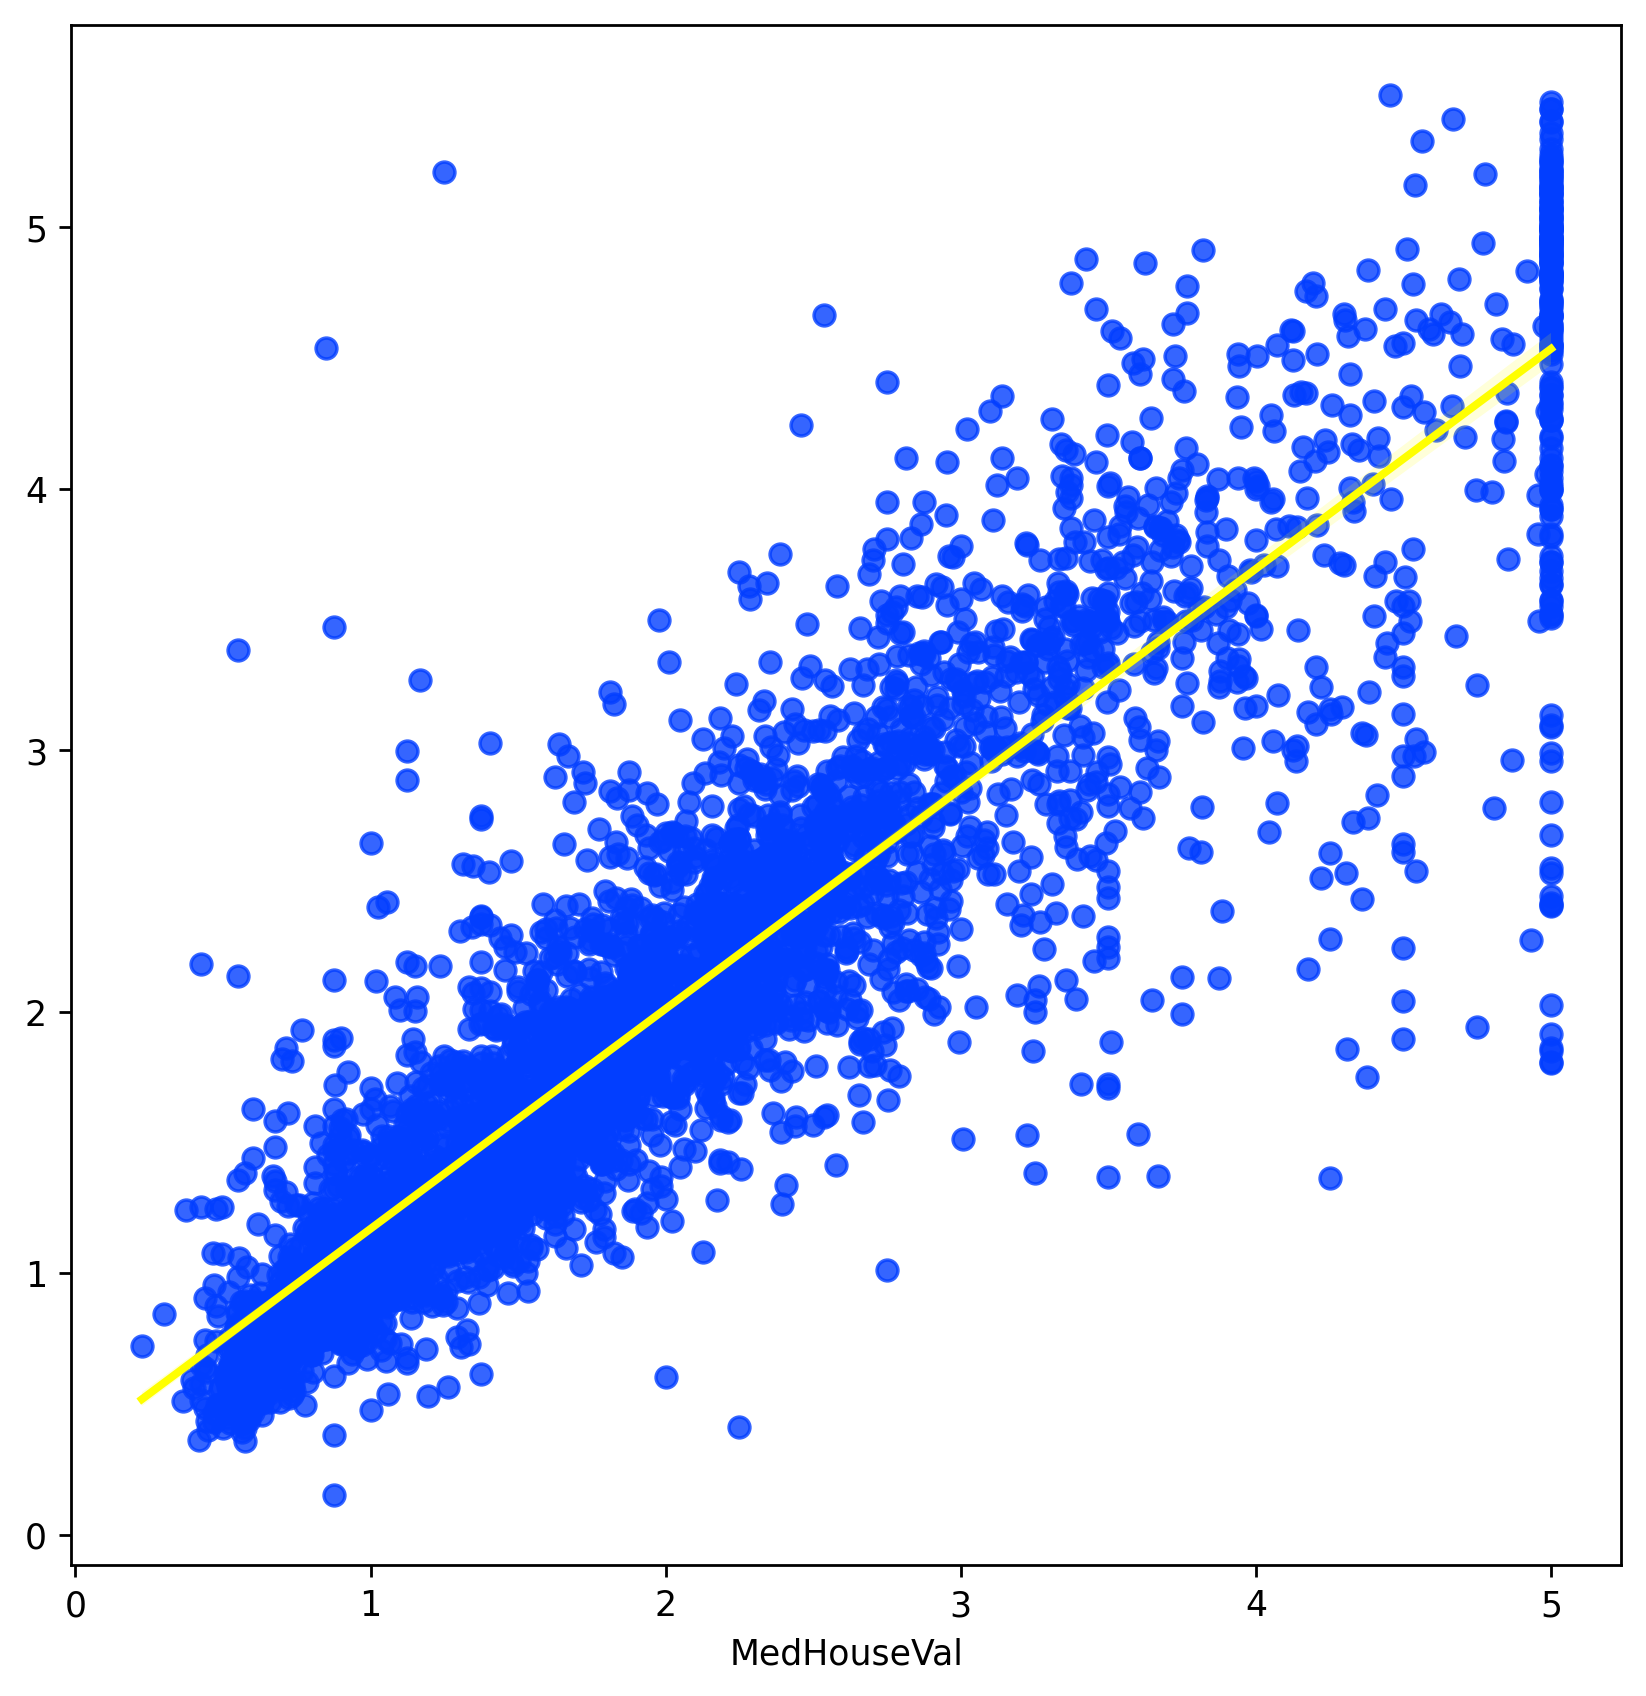

In [96]:
plt.figure(figsize=(8,8), dpi=250)
sns.regplot(x=y_test, y=y_score, line_kws={"color": "yellow"});

In [100]:
residuals = y_test - y_score
print(residuals)

18403   -0.443082
13405    0.097641
9539    -0.005543
8668     0.735812
9019    -0.051286
           ...   
10696   -0.091547
20360   -0.023798
10281    0.741597
7092    -0.059211
3219    -0.080658
Name: MedHouseVal, Length: 4128, dtype: float64


In [102]:
X_testResiduals = pd.concat([X_test, residuals], axis =1)
X_testResiduals.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
18403,5.4741,24.0,6.587799,1.060181,4017.0,3.311624,37.24,-121.84,-0.443082
13405,1.9583,7.0,5.362805,1.442073,1064.0,3.243902,34.10,-117.46,0.097641
9539,2.6058,40.0,3.885714,0.914286,785.0,4.485714,37.39,-120.71,-0.005543
8668,4.5817,30.0,4.146135,1.108696,1526.0,1.842995,33.82,-118.39,0.735812
9019,8.0137,9.0,7.734673,1.041211,12873.0,3.274739,34.16,-118.78,-0.051286
